In [3]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rand
from EDMtoolkit import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
filename = "baltic_sea_mesocosm_transformed.csv"

df = pd.read_csv(filename, encoding="utf-8", na_filter=False)
table = df.to_numpy()

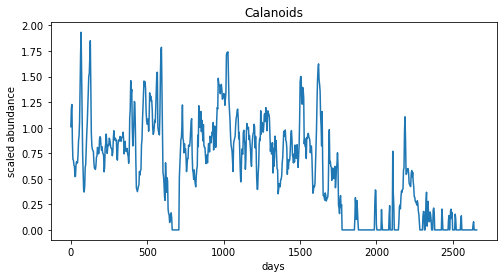

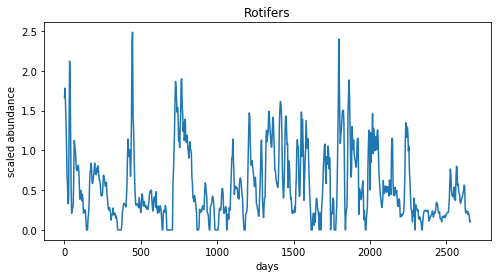

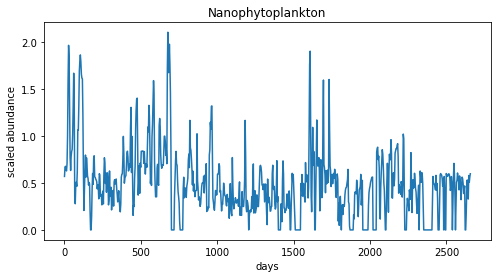

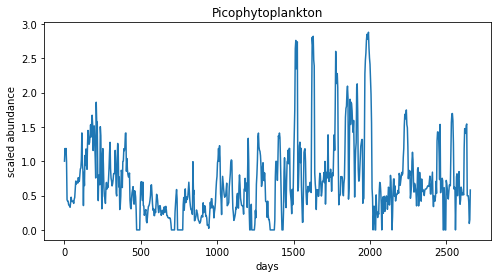

In [7]:
for i in range(4):
    fig, ax = plt.subplots(1,figsize=(8,4))
    ax.set_title(df.columns[i+1])
    ax.plot(table[:,0],table[:,i+1])
    ax.set_ylabel("scaled abundance")
    ax.set_xlabel("days")
    plt.show()
    
    # print(find_tau_autocorr(table[:,i]))

# Tau Determination with forecast skill

In [19]:
def embed(x, h=0, E=2, tau=1):
    return delayEmbed(x, tau-h, E-1, embInterval=tau)

In [28]:
(1,2,3)[2]

3

In [32]:
h = 0
E_max = 6
taus = np.arange(1,7)
r_sqrd_table = np.zeros((len(taus),4))


for i, series in enumerate(table.T[1:]):
    r_sqrds = [get_delta_agg(series, E_max-1, tau=tau, 
                             horizon = tau - h,
                             return_forecast_skill=True)[2] 
                   for tau in taus]
    r_sqrd_table[:,i] = r_sqrds
    print(r_sqrd)

[0.9313032033287393, 0.853756336328889, 0.9224832748714961, 0.9438376936333461, 0.9407141521815675, 0.9292934359662465]
[0.8569076042422076, 0.6504462848709236, 0.7890227642538521, 0.8616718053733048, 0.8623237510984317, 0.8693287629859238]
[0.6776200497111182, 0.3716048153890104, 0.5306385761147863, 0.6503147831043717, 0.5838348153539141, 0.5164145542264914]
[0.7711500818851174, 0.5993821595418555, 0.727668196177174, 0.7576686623313944, 0.7957170353120803, 0.7680573092978972]


In [ ]:

r_sqrd_table

In [4]:
# plotTS(np.correlate(standardize(table[:,4]),standardize(table[:,4]),"same"))

pico_stationary_period = table[375:600,4]
t = np.linspace(0,1,num=len(table[:,0]))
# t = np.linspace(0,1,num=len(pico_stationary_period))

In [13]:
delta_agg, r_sqrd, ns_area = get_delta_agg(table[:,2], 10, t=t, tau=1, horizon=1, return_forecast_skill=True)

<IPython.core.display.Javascript object>


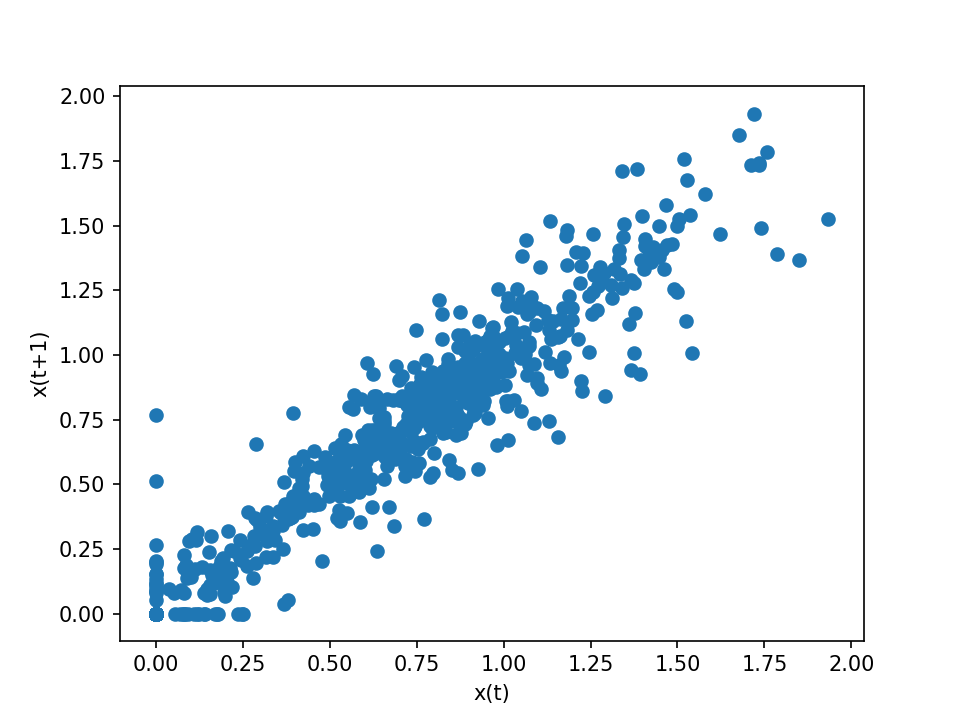

In [12]:
index = 1
poincare2d(table[:,index])

<IPython.core.display.Javascript object>


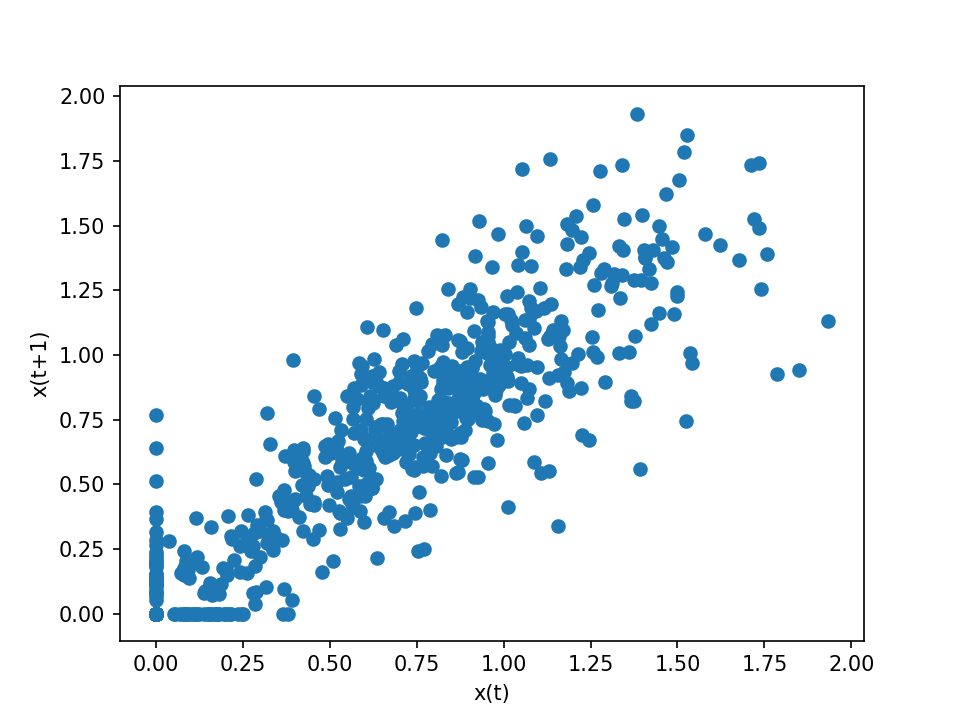

In [13]:
poincare2d(table[:,index], step=2)

<IPython.core.display.Javascript object>


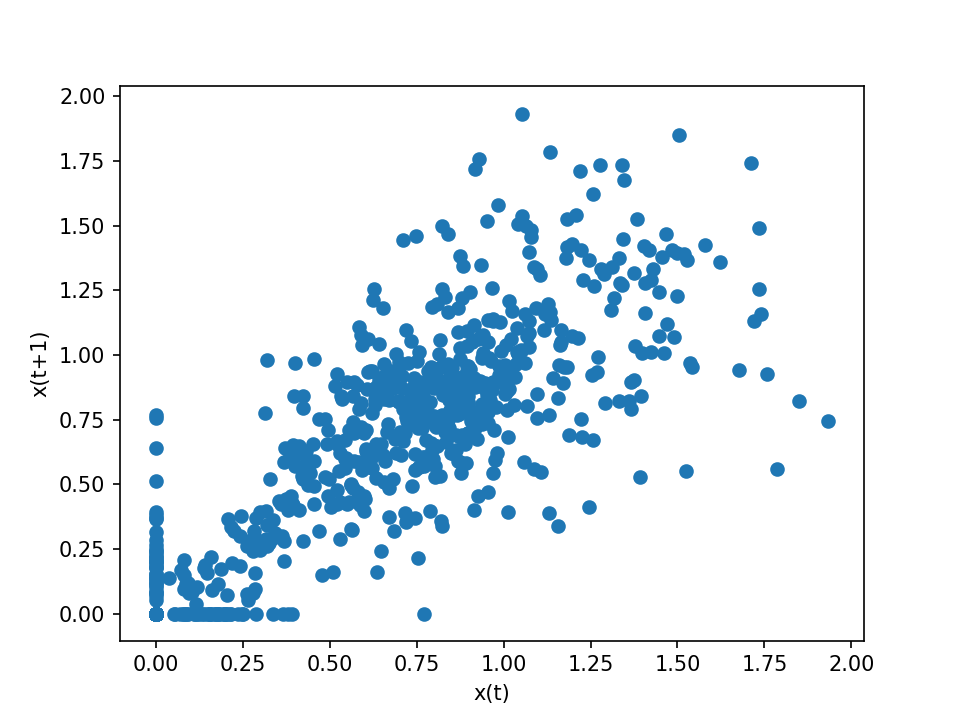

In [39]:
poincare2d(table[:,index], step=3)

<IPython.core.display.Javascript object>


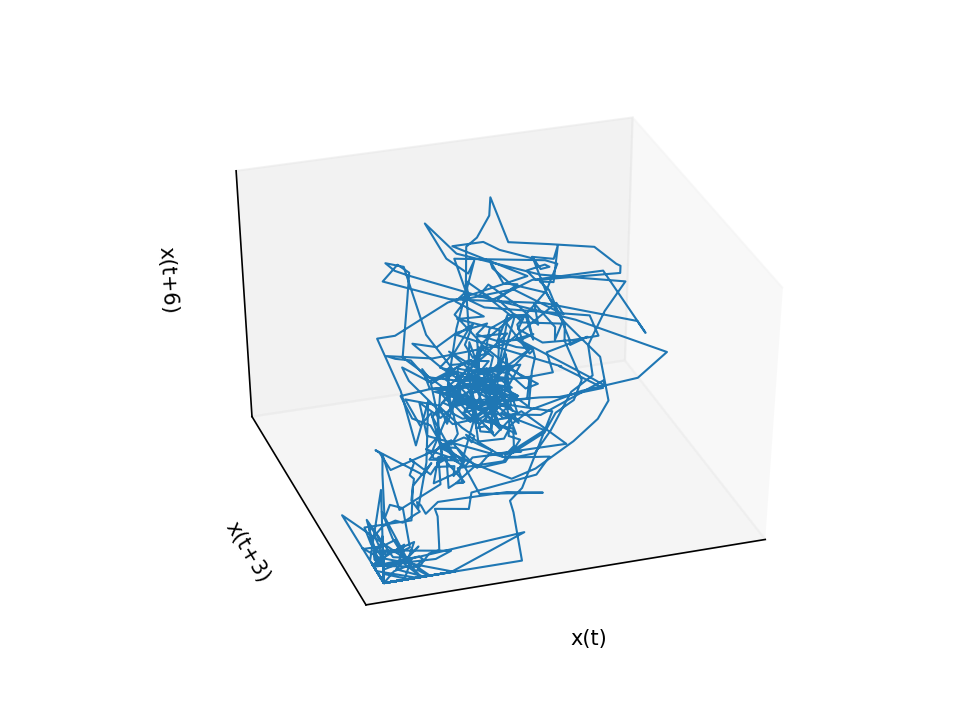

In [41]:
poincare3d(table[:,index], step=3, scatter=False)

<IPython.core.display.Javascript object>


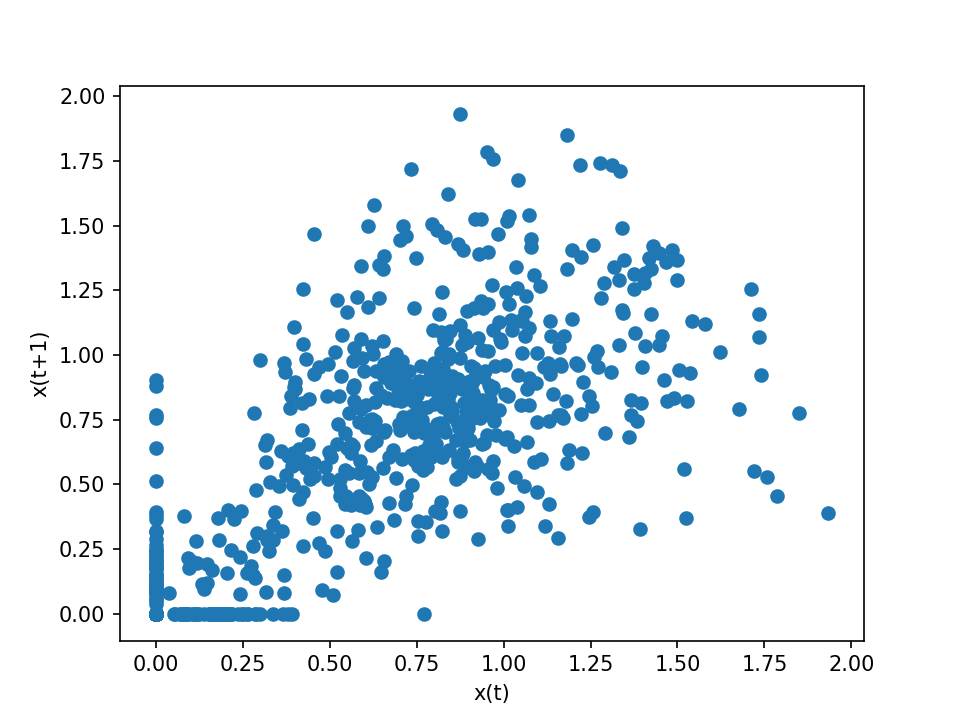

In [78]:
poincare2d(table[:,index], step=5)

<IPython.core.display.Javascript object>


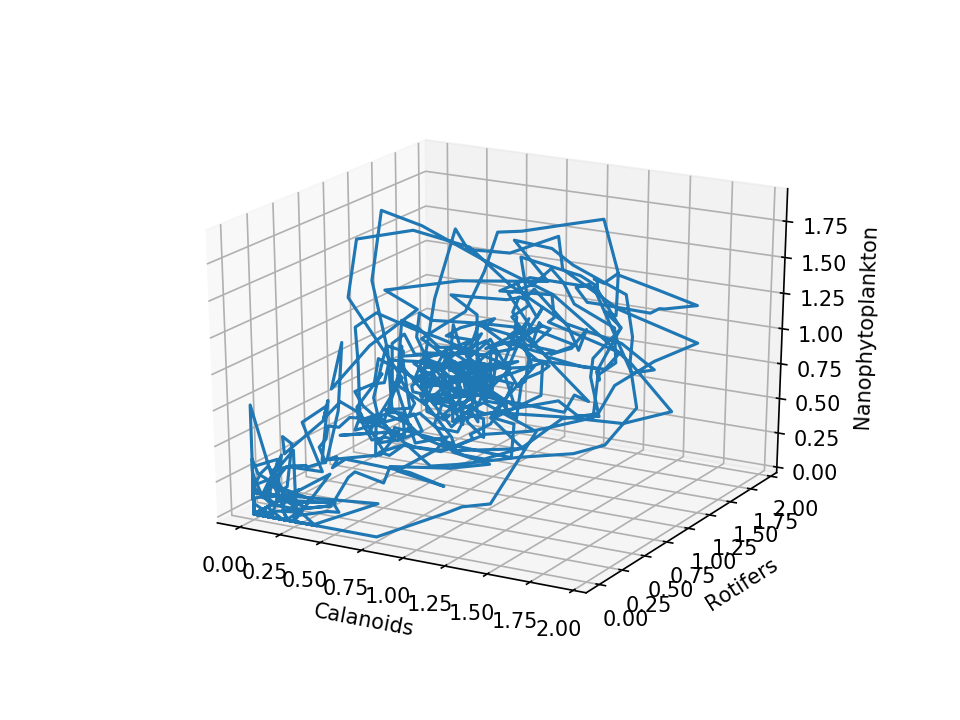

In [15]:
fig = plt.figure(10)
ax = fig.gca(projection="3d")
ax.plot(table[6:,1],table[3:-3,1],table[:-6,1])
ax.set_xlabel("Calanoids")
ax.set_ylabel("Rotifers")
ax.set_zlabel("Nanophytoplankton")
plt.show()

# Find the optimal tau for each series

In [4]:
h = 0
taus = np.arange(1,5)

In [5]:
taus

array([1, 2, 3, 4])

### Effect of Time Window on Baltic Sea Species

In [ ]:
## This code computes the delta for each subseries, no longer needed

"""
for i, species in zip([1,2,4], ["calanoids","rotifers","picophytoplankton"]):
    ts = standardize(table[:,i])
    maxLen = ts.shape[0]
    year_steps = 26
    lengths = np.arange(52,maxLen+1,step=year_steps)

    E_max = 4
    tau = 3

    # length, starting index, delta, theta, r_sqrd
    n_rows = 435
    results = np.zeros((n_rows, 5))
    tally = 0

    for length in lengths:
        for start in np.arange(0, maxLen - length+1, step=year_steps):
            
            ts_chunk = ts[start:length+start]
            delta, theta, r_sqrd = get_delta_agg(ts_chunk, E_max, tau=tau, return_forecast_skill=True)
            results[tally] = np.array([length, start, delta, theta, r_sqrd])
            
            tally += 1
            
    np.savetxt(f"{species}_time_window.csv",results, fmt="%i,%i,%0.5f,%0.5f,%0.5f")
"""

In [293]:
def makeHeatMapBaltic(results):
    nonstationarityHeatMap = np.zeros((29,29)) * np.nan
    for l, o, d, t, r in results:
        i_length = 28-(int(l / year_steps) - 2)
        i_offset = int(o / year_steps)
        # print(i_length, i_offset)
        nonstationarityHeatMap[i_length, i_offset] = d
        
    return nonstationarityHeatMap

In [327]:
def makeFigureBaltic(nonstationarityHeatMap, ts, name, ax):
    scaling = lengths[-1] *3.35 / 365
    
    im = ax.imshow(nonstationarityHeatMap[:-2], cmap='summer')
    ax.set_xticks(np.arange(31,step = 30 / scaling))
    ax.set_yticks(30-365*np.arange(1,8)/3.35/26) # DON'T TOUCH THIS LINE
    ax.set_xticklabels([])
    ax.set_yticklabels(np.arange(1,8))
    ax.set_ylim(27,-1)
    ax.set_xlim(-1.3,32)
    
    ax.set_ylabel("Time series length (years)",fontsize=15)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    cb.set_label(r"$\overline{\delta}$",fontsize=15)

    axTS = divider.append_axes('bottom', size='30%', pad=0.1)

    axTS.plot(table[:,0]/365, ts,c="green")
    axTS.set_ylabel(name,fontsize=15)
    axTS.set_xlabel("Start year",fontsize=15)
    axTS.set_yticks([])

    plt.show()

<IPython.core.display.Javascript object>


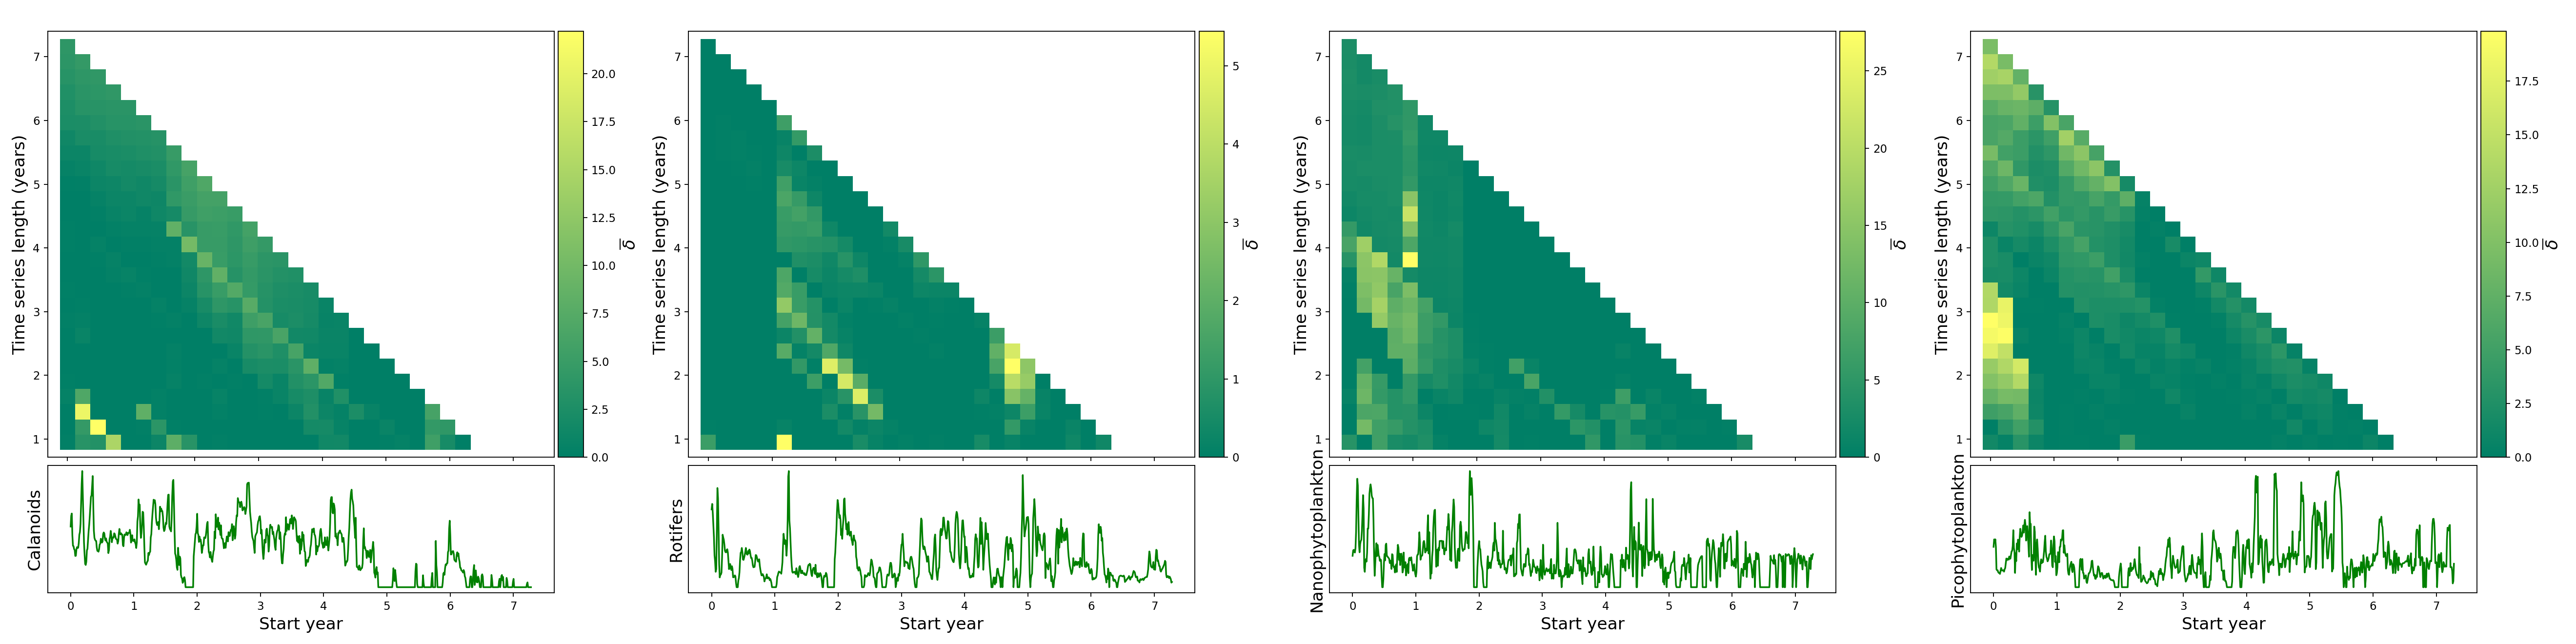

In [331]:
#for index in range(4):
indices = [0,1,2,3]

figb, axb = plt.subplots(1,len(indices),figsize=(8*len(indices),8))
for index in indices:
    species_list = ["Calanoids","Rotifers","Nanophytoplankton","Picophytoplankton"]
    results = np.loadtxt(f"{species_list[index]}_time_window.csv", delimiter=",")
    
    ts = standardize(table[:,index+1])
    nonstationarityHeatMap = makeHeatMapBaltic(results)
    makeFigureBaltic(nonstationarityHeatMap, ts, species_list[index], axb[int(index)])
    
plt.tight_layout()

In [326]:
results[:,[True, False, True, False, True]]
np.set_printoptions(suppress=True)
results[-1,[True, False, True, False, True]]

array([780.     ,   4.05881,   0.92332])

<IPython.core.display.Javascript object>


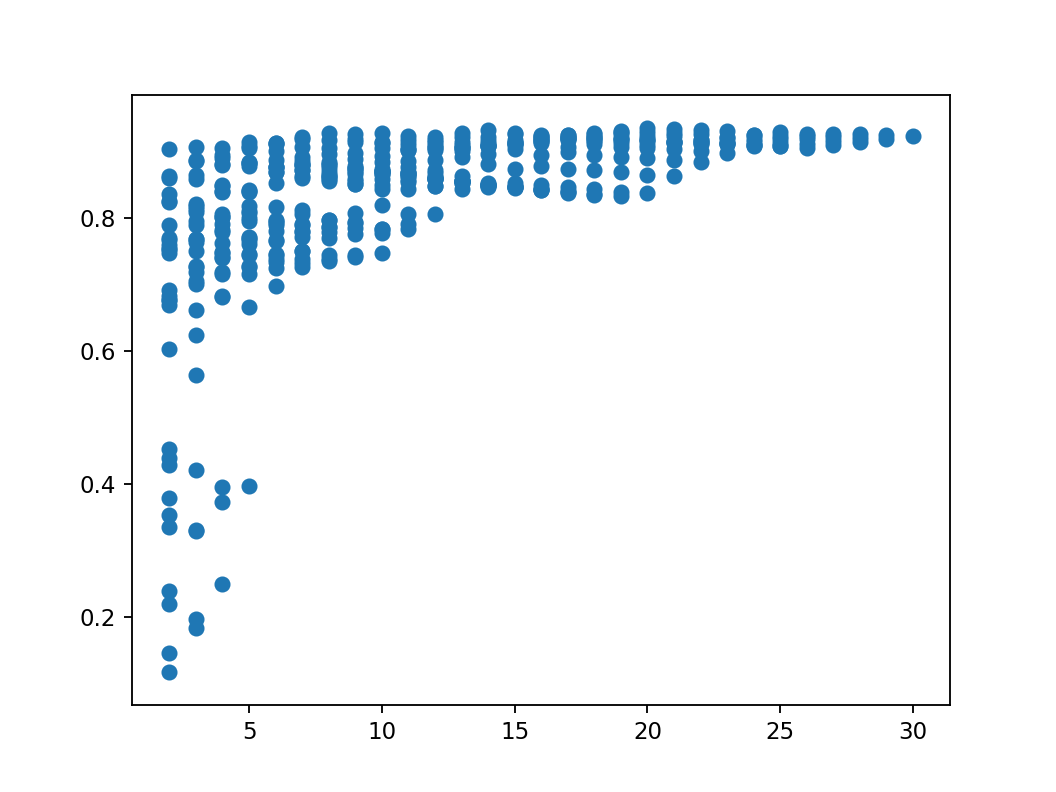

In [316]:
figr2 = plt.figure()
plt.scatter(results[:,0]/year_steps,results[:,-1])